In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

import os
import os.path as path
import wget

In [2]:
X = np.array([-1.,0.,1.])
Y = np.array([2,0,2])

In [6]:
f1 = (Y[1]-Y[0])/(X[1]-X[0])
f2 = (Y[2]-Y[1])/(X[2]-X[1])
print(f1,f2)

-2.0 2.0


In [7]:
d2f = (f2-f1)/(X[2]-X[0])
print(d2f)

2.0


In [8]:
x = np.linspace(-1,1,50)
y = Y[0] + f1*(x-X[0]) + d2f*(x-X[0])*(x-X[1])

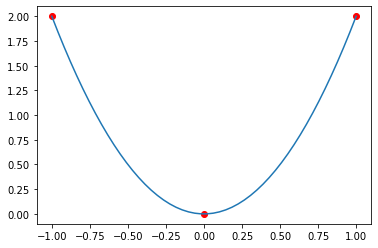

In [10]:
plt.scatter(X,Y,color='r')
plt.plot(x,y)

In [12]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/InterpolacionNewton.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Archivo descargado')
else:
    print('---Archivo encontrado---')
    Path_ = file

100% [....................................................................................] 45 / 45Archivo descargado


In [15]:
Data = pd.read_csv(Path_,sep=',')
Data

,X,Y
0,-3,39
1,-1,19
2,1,-21
3,3,-57
4,5,-65
5,7,-21
6,9,99


In [16]:
X = np.array(Data.X)
Y = np.array(Data.Y)

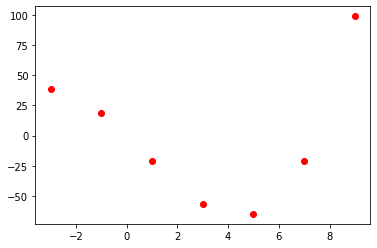

In [17]:
plt.scatter(X,Y,color='r')

In [21]:
Diff = np.zeros(( X.shape[0],Y.shape[0] ))
Diff[:,0] = Y


for i in range(1,len(X)):
    for j in range(i,len(X)):
        Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1] 

Diff

array([[ 39.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 19., -20.,   0.,   0.,   0.,   0.,   0.],
       [-21., -40., -20.,   0.,   0.,   0.,   0.],
       [-57., -36.,   4.,  24.,   0.,   0.,   0.],
       [-65.,  -8.,  28.,  24.,   0.,   0.,   0.],
       [-21.,  44.,  52.,  24.,   0.,   0.,   0.],
       [ 99., 120.,  76.,  24.,   0.,   0.,   0.]])

In [22]:
def InterpolacionNewton(X,Y,x):
    
    sum_ = Y[0]
    
    Diff = np.zeros(( X.shape[0],Y.shape[0] ))
    h = X[1]-X[0]
    
    Diff[:,0] = Y

    poly = 1.
    
    for i in range(1,len(X)):
        
        poly += (x-X[i-1])
        
        for j in range(i,len(X)):
            
            Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1] 
    
        sum_ += poly*Diff[i,i]/np.math.factorial(i)*h**(i)
        
    return sum_

In [28]:
xt = np.linspace(np.min(X),np.max(X),100)
yt = []

for x in xt:
    yt.append(InterpolacionNewton(X,Y,x))


In [29]:
yN

array([-169.        , -169.97959184, -170.95918367, -171.93877551,
       -172.91836735, -173.89795918, -174.87755102, -175.85714286,
       -176.83673469, -177.81632653, -178.79591837, -179.7755102 ,
       -180.75510204, -181.73469388, -182.71428571, -183.69387755,
       -184.67346939, -185.65306122, -186.63265306, -187.6122449 ,
       -188.59183673, -189.57142857, -190.55102041, -191.53061224,
       -192.51020408, -193.48979592, -194.46938776, -195.44897959,
       -196.42857143, -197.40816327, -198.3877551 , -199.36734694,
       -200.34693878, -201.32653061, -202.30612245, -203.28571429,
       -204.26530612, -205.24489796, -206.2244898 , -207.20408163,
       -208.18367347, -209.16326531, -210.14285714, -211.12244898,
       -212.10204082, -213.08163265, -214.06122449, -215.04081633,
       -216.02040816, -217.        ])

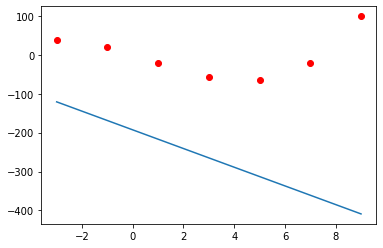

In [31]:
plt.scatter(X,Y,color='r')
plt.plot(xt,yt)